<a href="https://colab.research.google.com/github/yliawt/Water-Potability-with-Machine-Learning/blob/main/75_Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Load Data

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Load dataset
file_path = 'water_potability.csv'
df = pd.read_csv(file_path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [3]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.000000,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [4]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000
Potability,1998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# 2.0 Data Cleaning

## 2.1 Outlier Data

In [6]:
df['Potability']=df['Potability'].astype('category')

In [7]:
#create approve limit for each features based on data available in Google search
cols=df.columns[0:9].to_list()
min_val=[6.52,0,500,0,3,0,0,0,0]
max_val=[6.83,0,1000,4,250,400,2,80,5]
limit=pd.DataFrame(data=[min_val, max_val], columns=cols)

In [8]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,2785.000000,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.000000,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.000000,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.000000,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.000000,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.000000,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.000000,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.000000,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.000000,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000


In [9]:
#Portability is 1 - means good for Human
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
ph,1101.000000,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.000000,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.000000,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.000000,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.000000,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.000000,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.000000,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.000000,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.000000,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249


In [10]:
# Portability is 0 - means not good for Human
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdBu')

,count,mean,std,min,25%,50%,75%,max
ph,1684.000000,7.085378,1.683499,0.000000,6.037723,7.035456,8.155510,14.000000
Hardness,1998.000000,196.733292,31.057540,98.452931,177.823265,197.123423,216.120687,304.235912
Solids,1998.000000,21777.490788,8543.068788,320.942611,15663.057382,20809.618280,27006.249009,61227.196008
Chloramines,1998.000000,7.092175,1.501045,1.683993,6.155640,7.090334,8.066462,12.653362
Sulfate,1510.000000,334.564290,36.745549,203.444521,311.264006,333.389426,356.853897,460.107069
Conductivity,1998.000000,426.730454,80.047317,181.483754,368.498530,422.229331,480.677198,753.342620
Organic_carbon,1998.000000,14.364335,3.334554,4.371899,12.101057,14.293508,16.649485,28.300000
Trihalomethanes,1891.000000,66.303555,16.079320,0.738000,55.706530,66.542198,77.277704,120.030077
Turbidity,1998.000000,3.965800,0.780282,1.450000,3.444062,3.948076,4.496106,6.739000


##2.1 Missing Data

In [11]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


In [13]:
#Replace null values based on the group/sample mean
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [14]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# 3.0 Exploratory Data Analysis

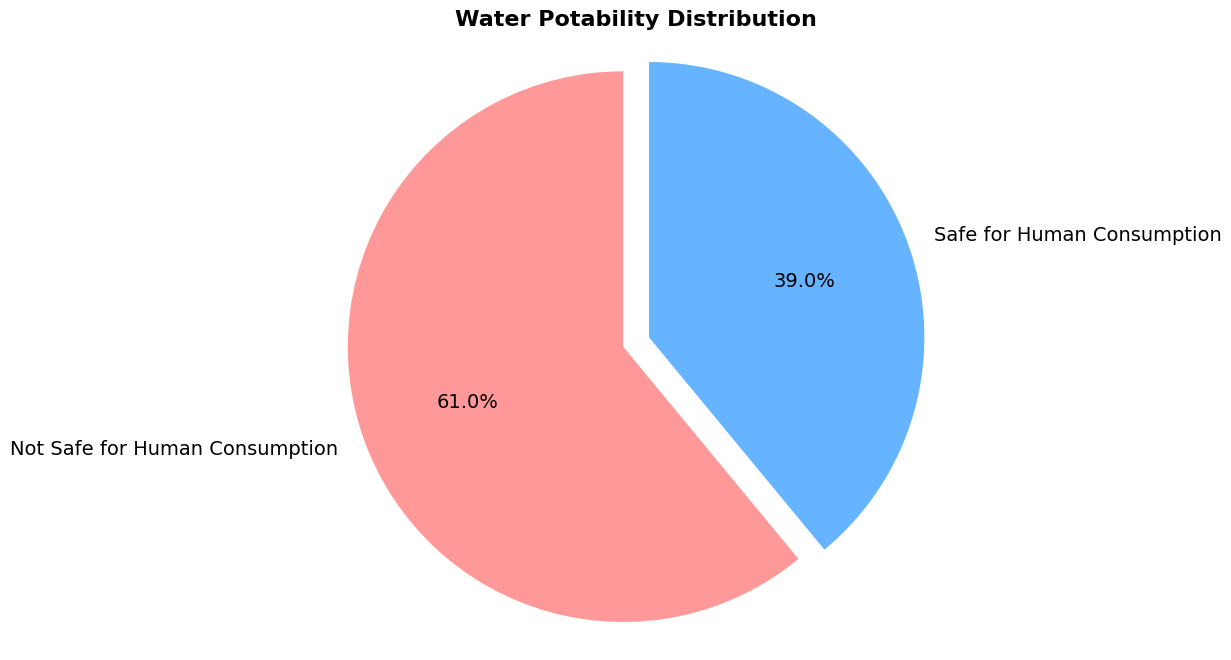

In [15]:
import matplotlib.pyplot as plt

# Calculate the counts and percentages
counts = df['Potability'].value_counts()
labels = ['Not Safe for Human Consumption', 'Safe for Human Consumption']
sizes = counts.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (Not Safe for Human Consumption)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14})

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add title
plt.title("Water Potability Distribution", fontsize=16, fontweight='bold')

plt.show()


In [16]:
limit

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.52,0,500,0,3,0,0,0,0
1,6.83,0,1000,4,250,400,2,80,5


<ipython-input-17-0e0af35fe118>:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0, 0, 1, 0.96])


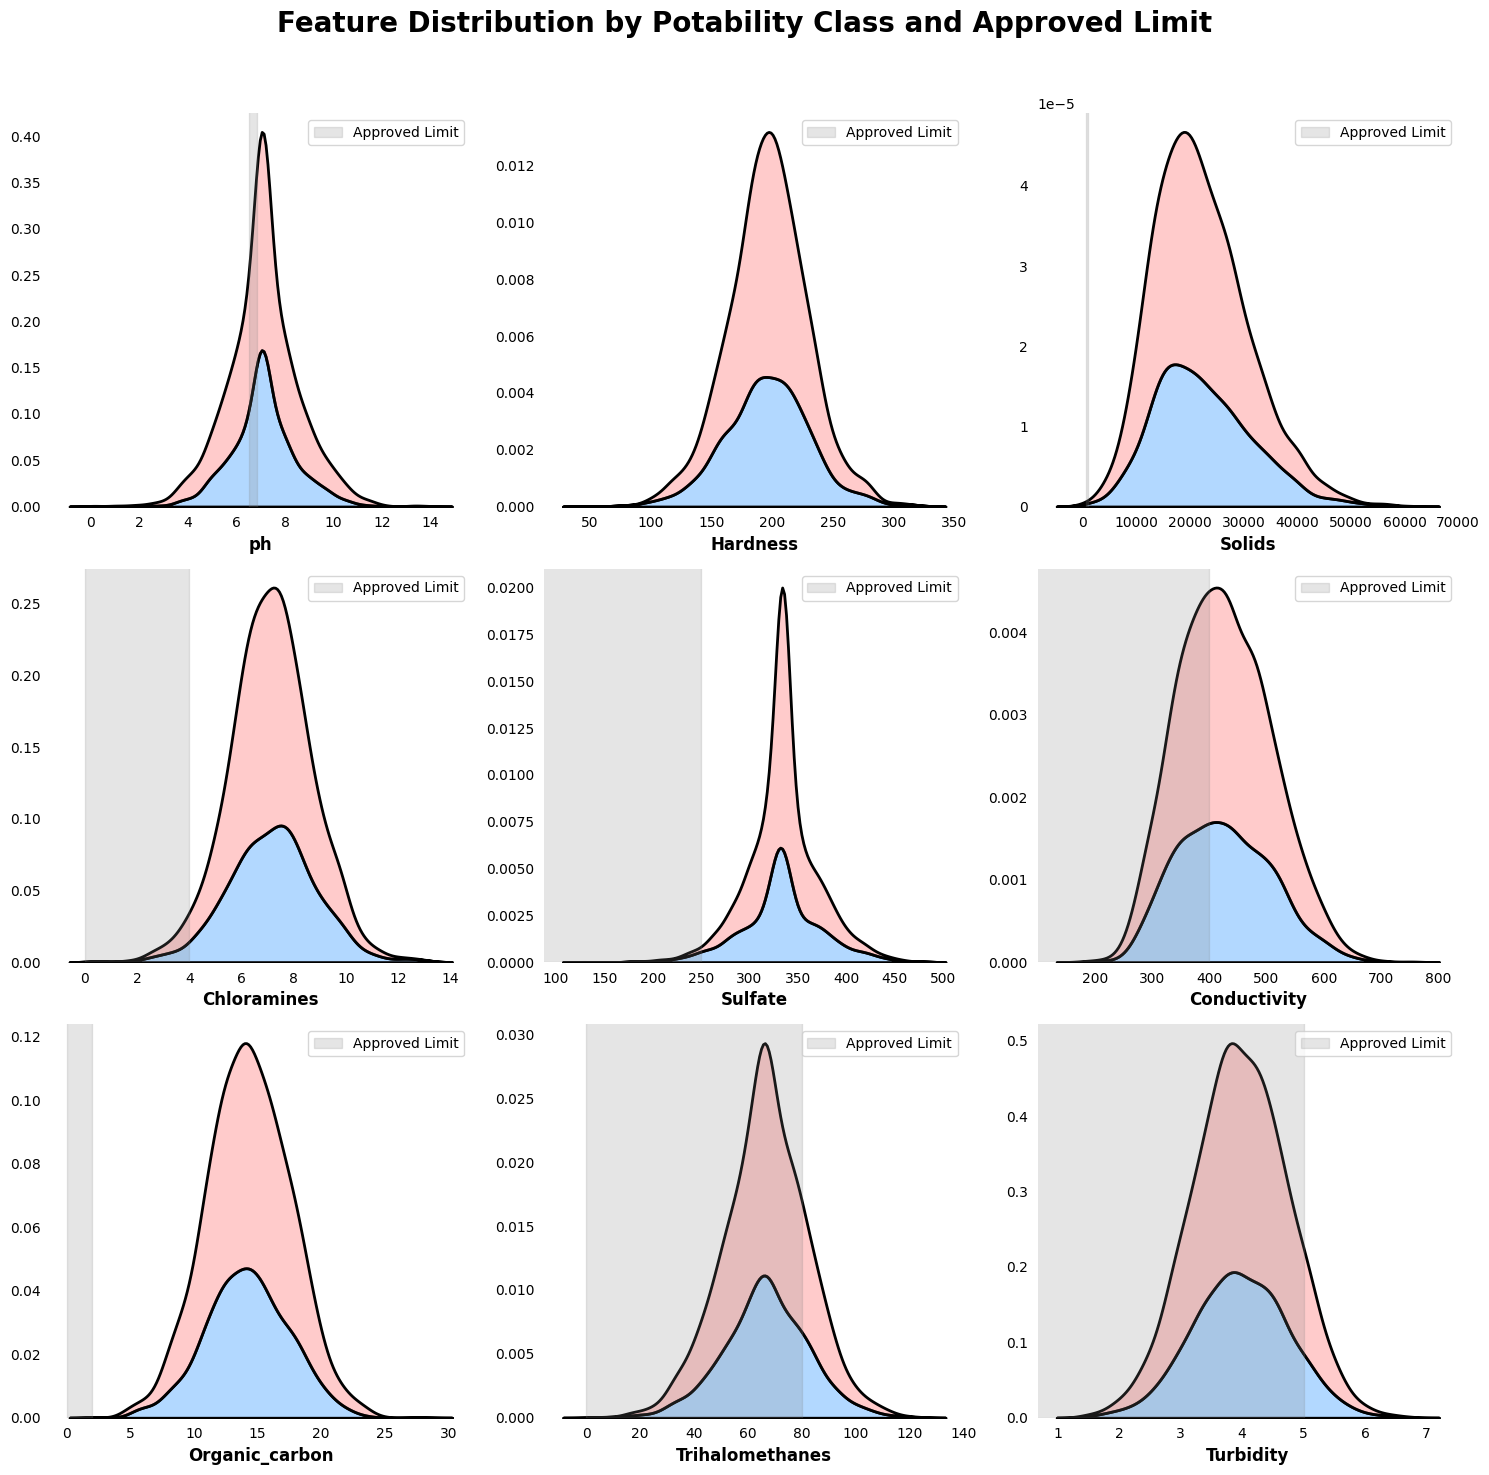

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Select numeric columns
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
fig.suptitle('Feature Distribution by Potability Class and Approved Limit', size=20, weight='bold')
ax = ax.flatten()

# Define colors for potability classes
palette = {0: '#ff9999', 1: '#66b3ff'}

# Plot each feature distribution with KDE plot and approved limits
for x, i in enumerate(int_cols):
    sns.kdeplot(data=df, x=i, hue='Potability', ax=ax[x], fill=True, multiple='stack', alpha=0.5, linewidth=2, palette=palette)
    l, k = limit.iloc[:, x]
    ax[x].add_patch(Rectangle(xy=(l, 0), width=k-l, height=1, alpha=0.2, color='grey', label='Approved Limit'))

    # Customize axes
    ax[x].spines['left'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['bottom'].set_visible(False)
    ax[x].tick_params(left=False, bottom=False)
    ax[x].set_xlabel(i, fontsize=12, weight='bold')
    ax[x].set_ylabel('')
    ax[x].legend(loc='upper right', fontsize=10)

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<ipython-input-18-fe3089b93477>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Potability', ax=ax[x], palette=palette)
<ipython-input-18-fe3089b93477>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Potability', ax=ax[x], palette=palette)
<ipython-input-18-fe3089b93477>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=i, x='Potability', ax=ax[x], palette=palette)
<ipython-input-18-fe3089b93477>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

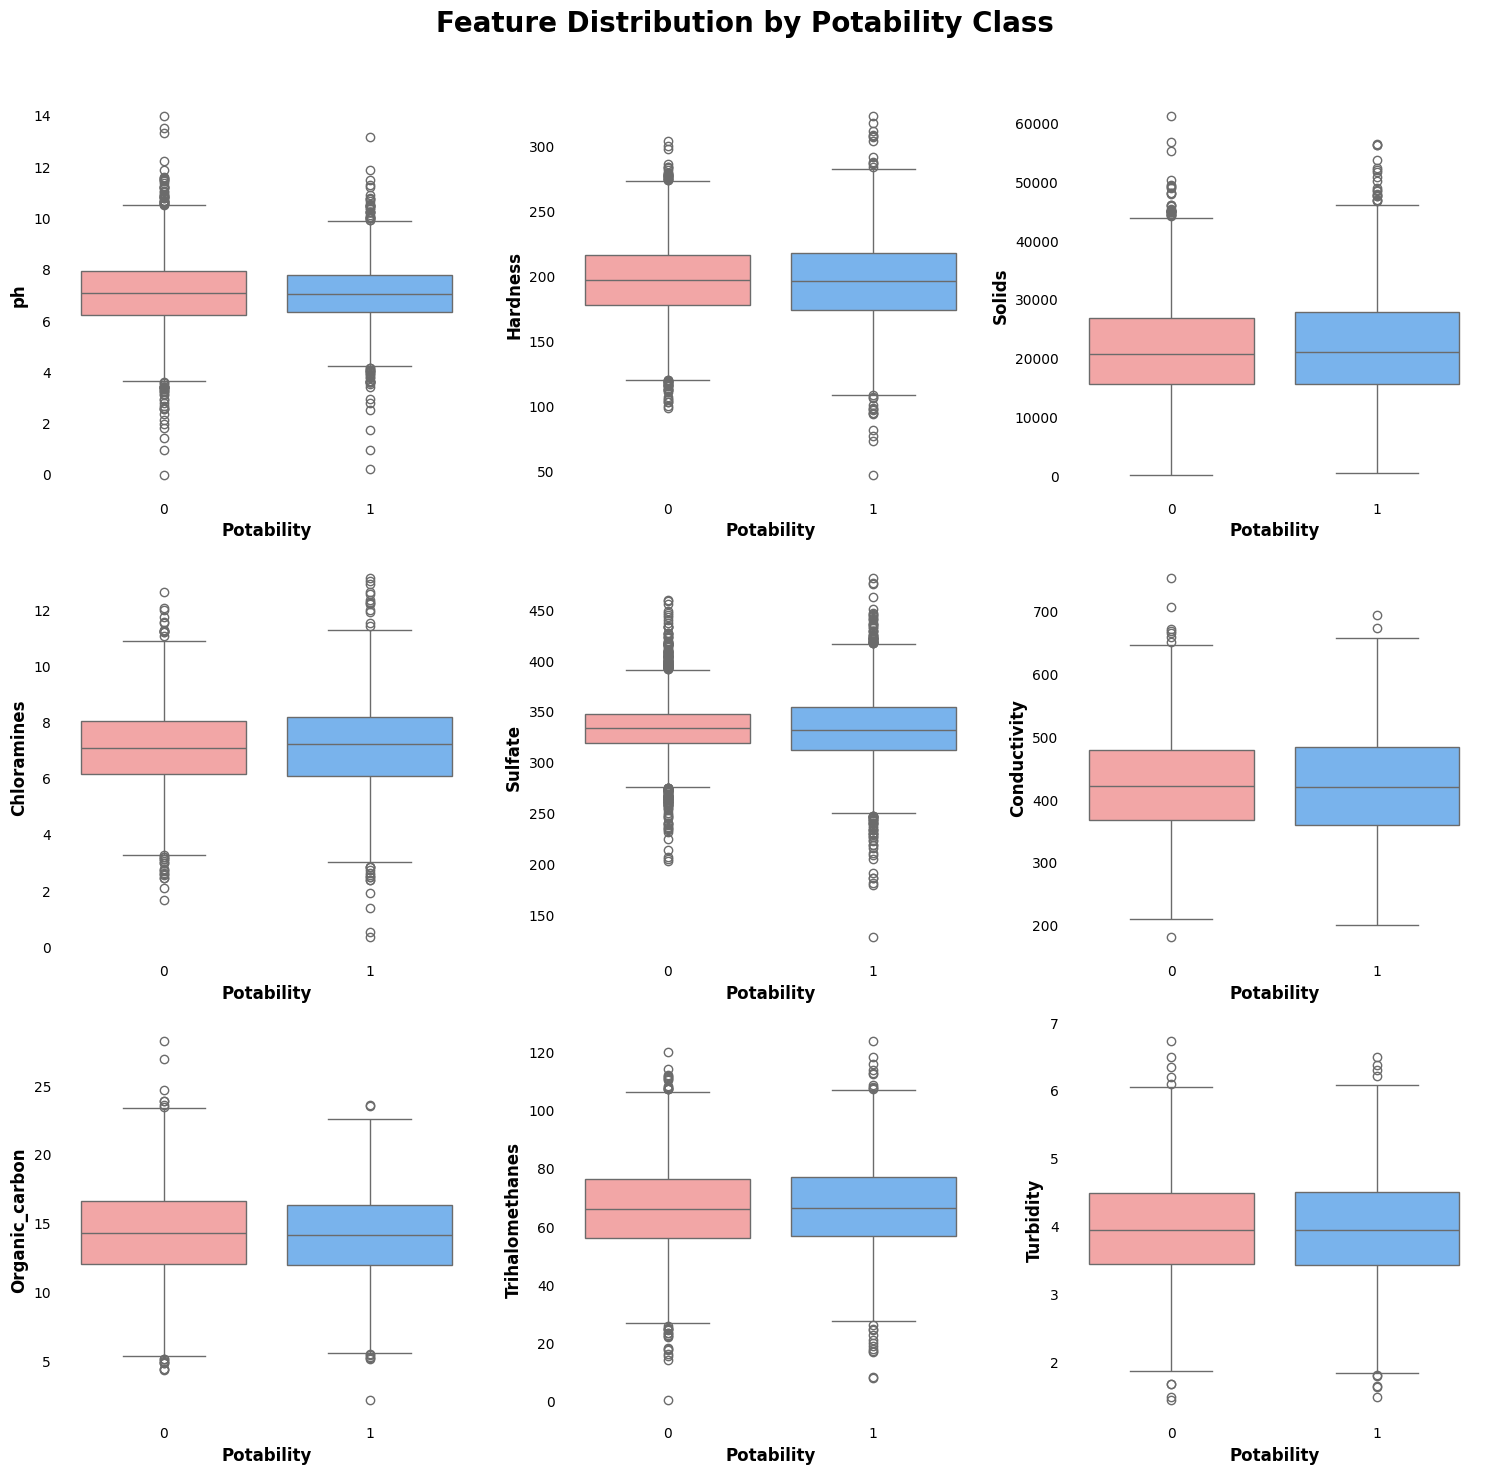

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
int_cols = df.select_dtypes(exclude=['category']).columns.to_list()

# Create subplots
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
fig.suptitle('Feature Distribution by Potability Class', size=20, weight='bold')
ax = ax.flatten()

# Define colors for potability classes
palette = ['#ff9999', '#66b3ff']

# Plot each feature distribution with boxplot
for x, i in enumerate(int_cols):
    sns.boxplot(data=df, y=i, x='Potability', ax=ax[x], palette=palette)

    # Customize axes
    ax[x].spines['left'].set_visible(False)
    ax[x].spines['right'].set_visible(False)
    ax[x].spines['top'].set_visible(False)
    ax[x].spines['bottom'].set_visible(False)
    ax[x].tick_params(left=False, bottom=False)
    ax[x].set_xlabel('Potability', fontsize=12, weight='bold')
    ax[x].set_ylabel(i, fontsize=12, weight='bold')

# Improve layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


p_value for ph is 0.8257362194511633, so we accept the Null Hypothesis.
p_value for Hardness is 0.42854158740864634, so we accept the Null Hypothesis.
p_value for Solids is 0.053463638184504905 which is less than the significance value 0.1, so we reject the Null Hypothesis.
p_value for Chloramines is 0.17361022465074658, so we accept the Null Hypothesis.
p_value for Sulfate is 0.12292453703923875, so we accept the Null Hypothesis.
p_value for Conductivity is 0.6418845485973537, so we accept the Null Hypothesis.
p_value for Organic_carbon is 0.08599746163873828 which is less than the significance value 0.1, so we reject the Null Hypothesis.
p_value for Trihalomethanes is 0.675988889793878, so we accept the Null Hypothesis.
p_value for Turbidity is 0.9279391620838058, so we accept the Null Hypothesis.


<ipython-input-19-dd450488c195>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=stats_test, x='columns', y='p_value', palette='viridis')


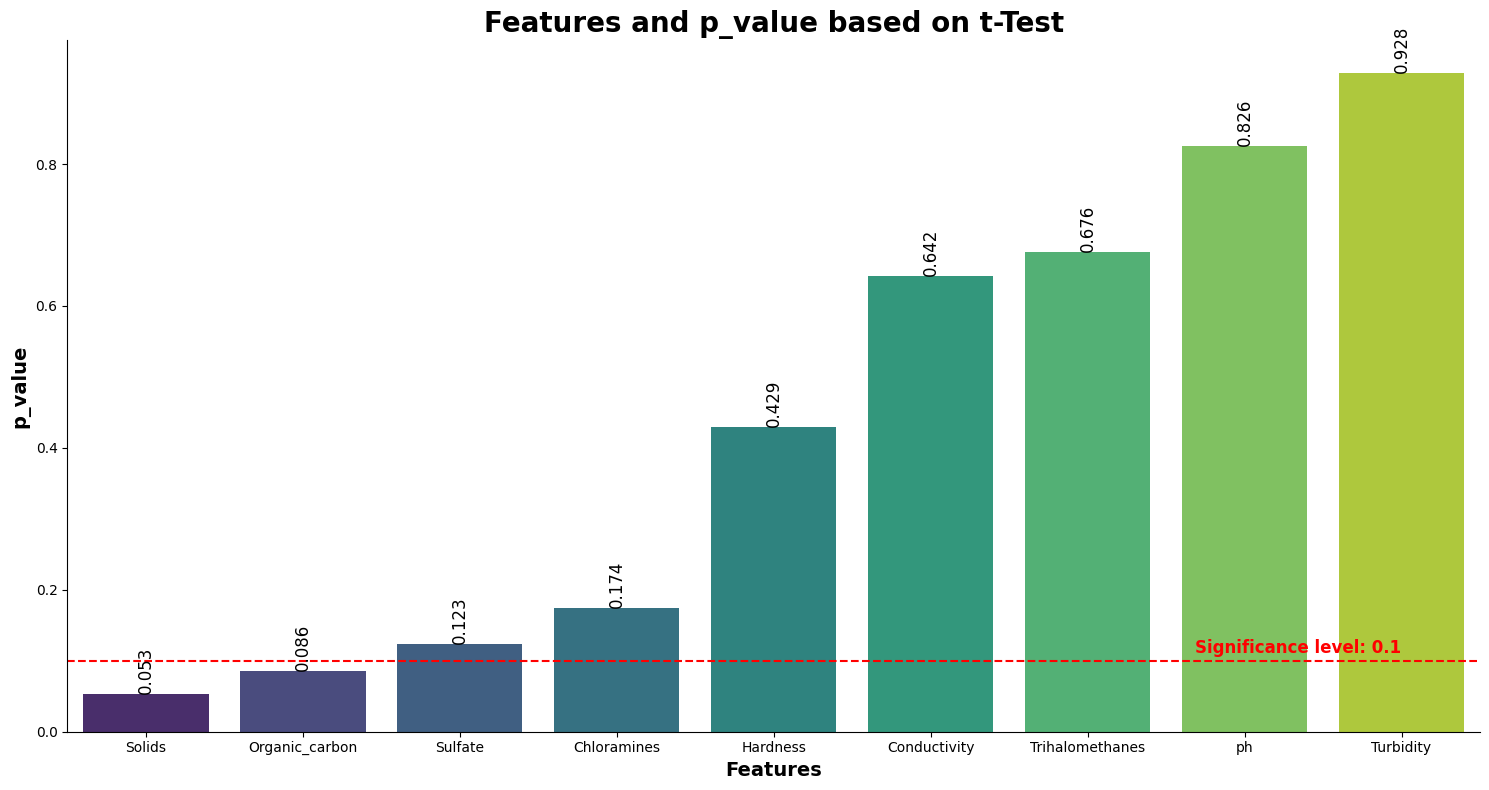

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Perform t-tests and collect p-values
p_val = []
for i in int_cols:
    pota_1 = df[df['Potability'] == 1][i]
    pota_0 = df[df['Potability'] == 0][i]
    stat, p_value = ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value, 3))
    if p_value < 0.1:
        print(f"p_value for {i} is {p_value} which is less than the significance value 0.1, so we reject the Null Hypothesis.")
    else:
        print(f"p_value for {i} is {p_value}, so we accept the Null Hypothesis.")

# Create DataFrame for p-values
stats_test = pd.DataFrame({'columns': int_cols, 'p_value': p_val})
stats_test.sort_values(by=['p_value'], ascending=True, inplace=True)

# Plotting the bar plot for p-values
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(data=stats_test, x='columns', y='p_value', palette='viridis')

# Add title and annotations
plt.title("Features and p_value based on t-Test", size=20, weight='bold')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.3f}', ha='center', va='bottom', fontsize=12, rotation=90)

# Add horizontal line for significance level
ax.axhline(y=0.1, color='red', linestyle='--')
ax.text(len(int_cols) - 1, 0.105, "Significance level: 0.1", color='red', ha='right', va='bottom', fontsize=12, weight='bold')

# Customize axes
ax.set_xlabel('Features', fontsize=14, weight='bold')
ax.set_ylabel('p_value', fontsize=14, weight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


# 4.0 Correlation Analysis

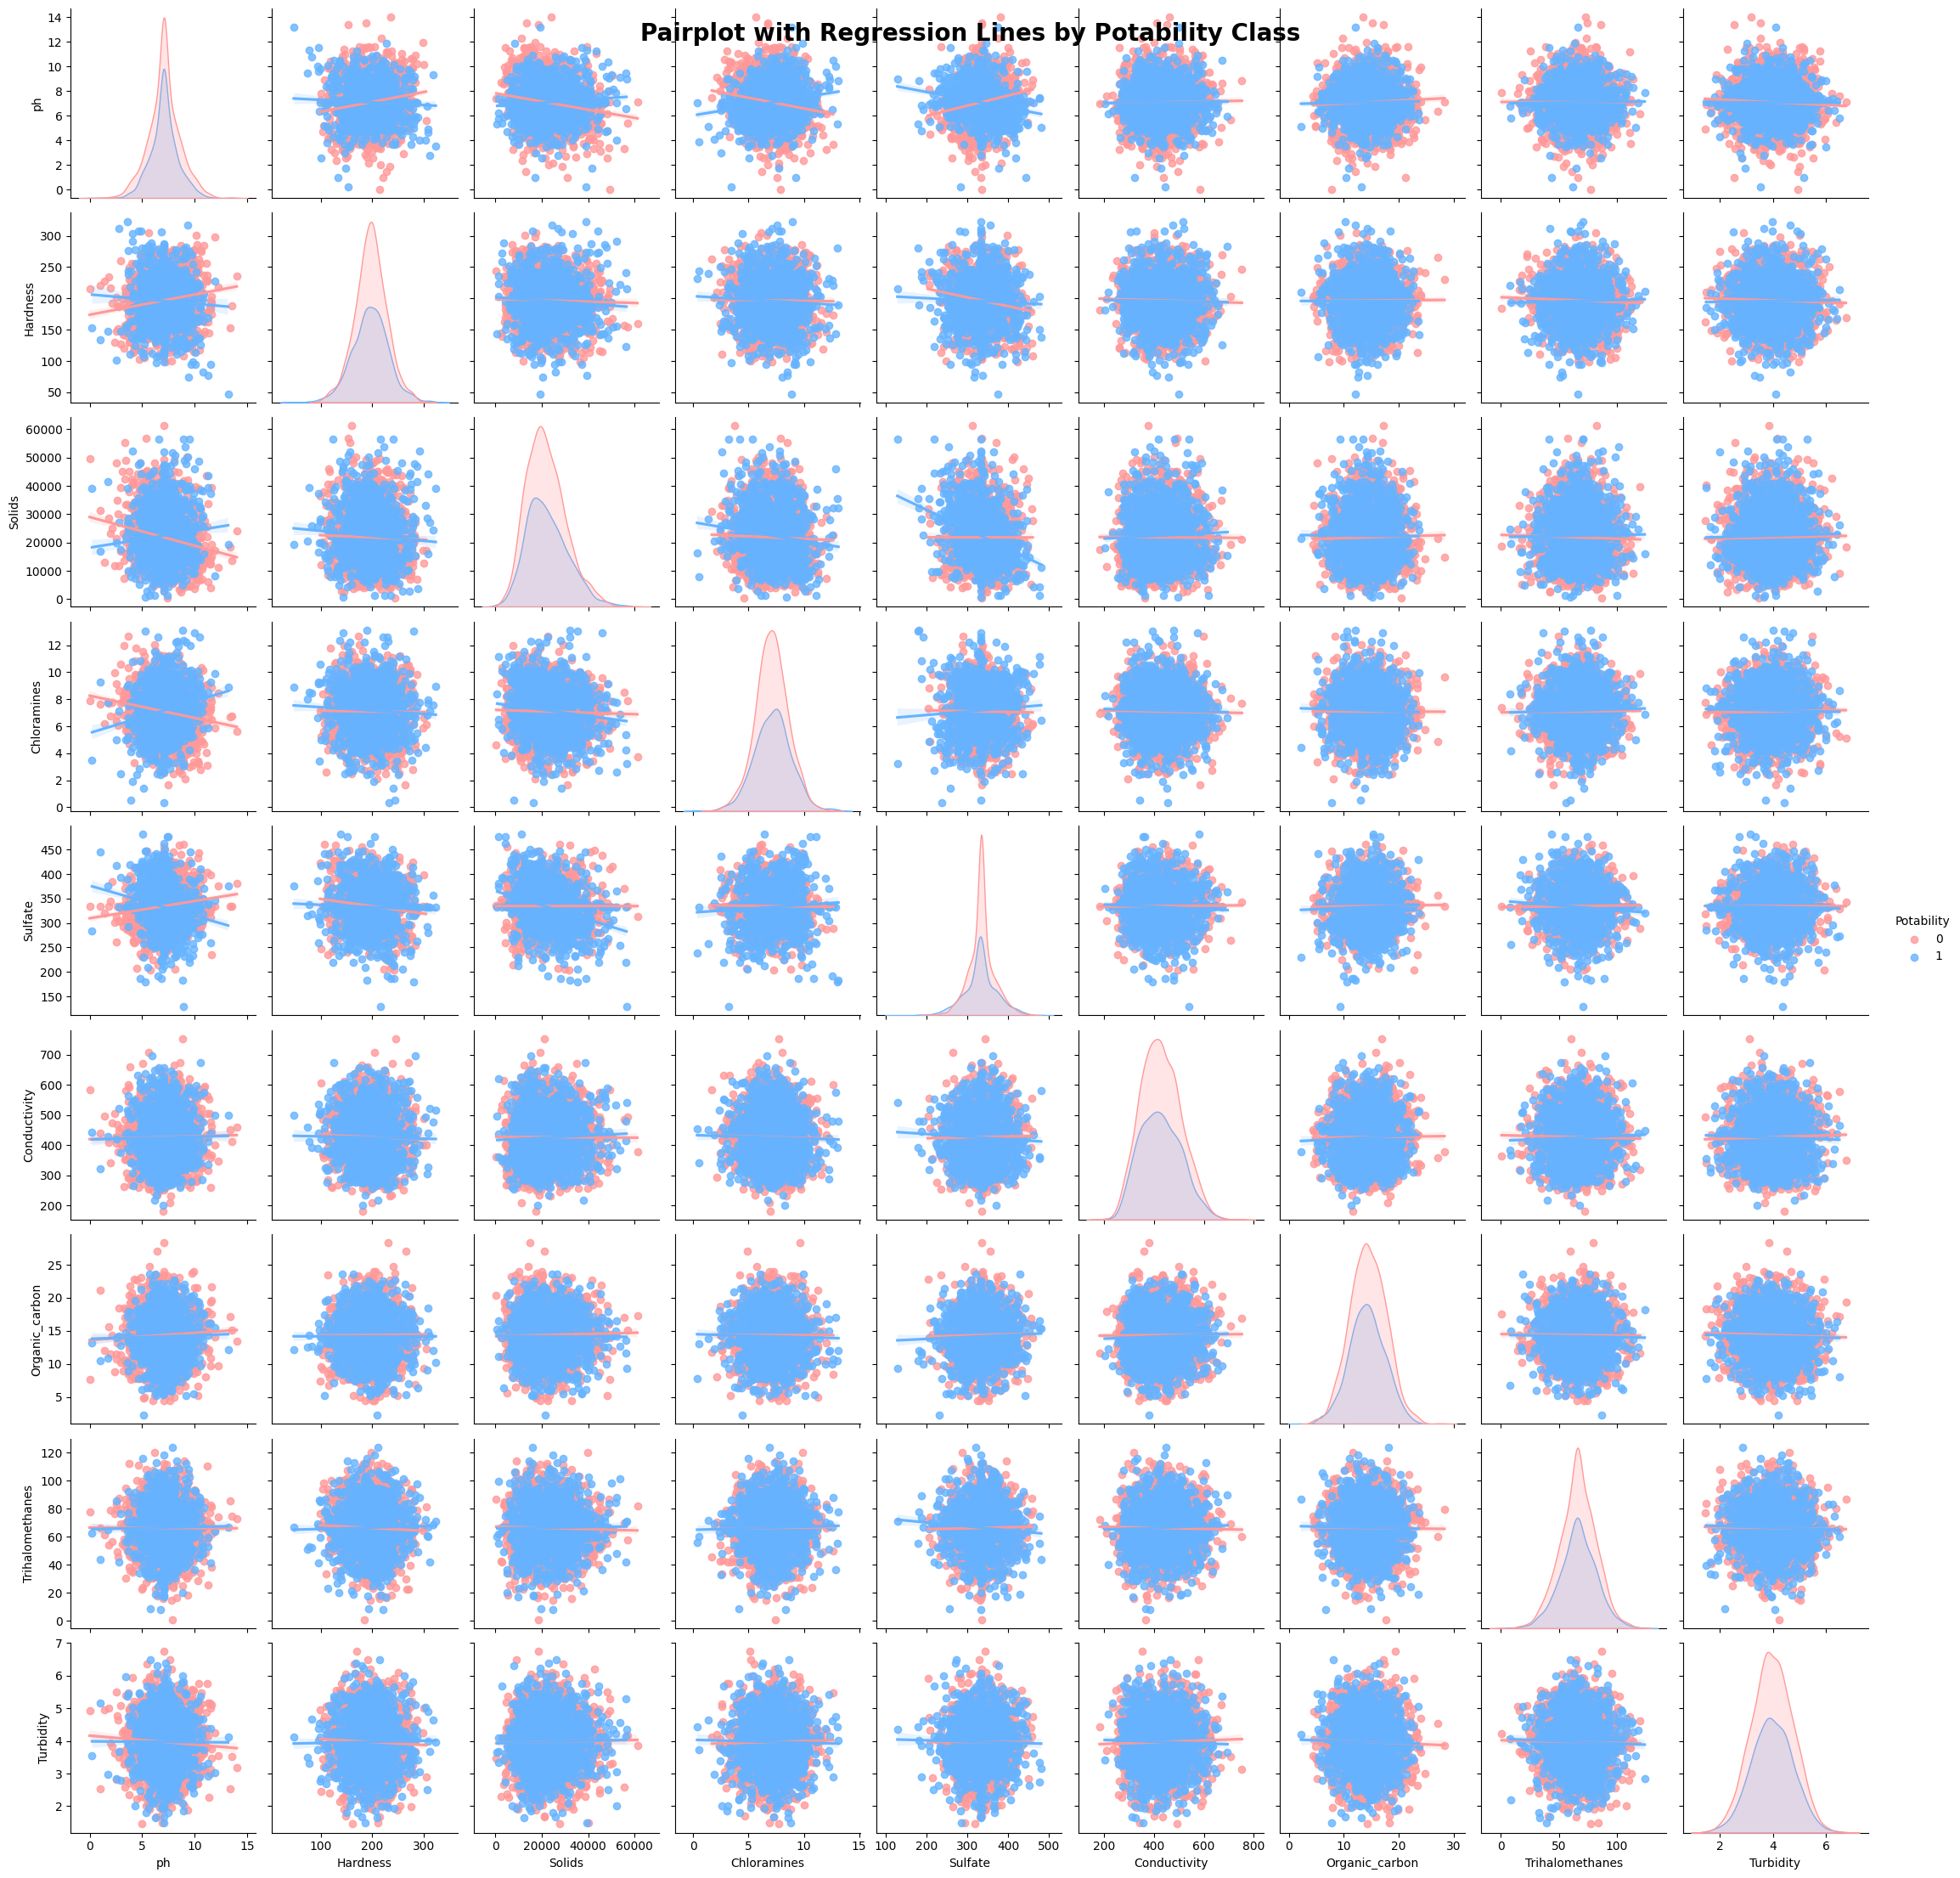

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for potability classes
palette = {0: '#ff9999', 1: '#66b3ff'}

# Create pairplot with regression lines
sns.pairplot(df, hue='Potability', kind='reg', palette=palette, diag_kind='kde')

# Customize and show the plot
plt.suptitle('Pairplot with Regression Lines by Potability Class', size=20, weight='bold')
plt.show()


<Axes: >

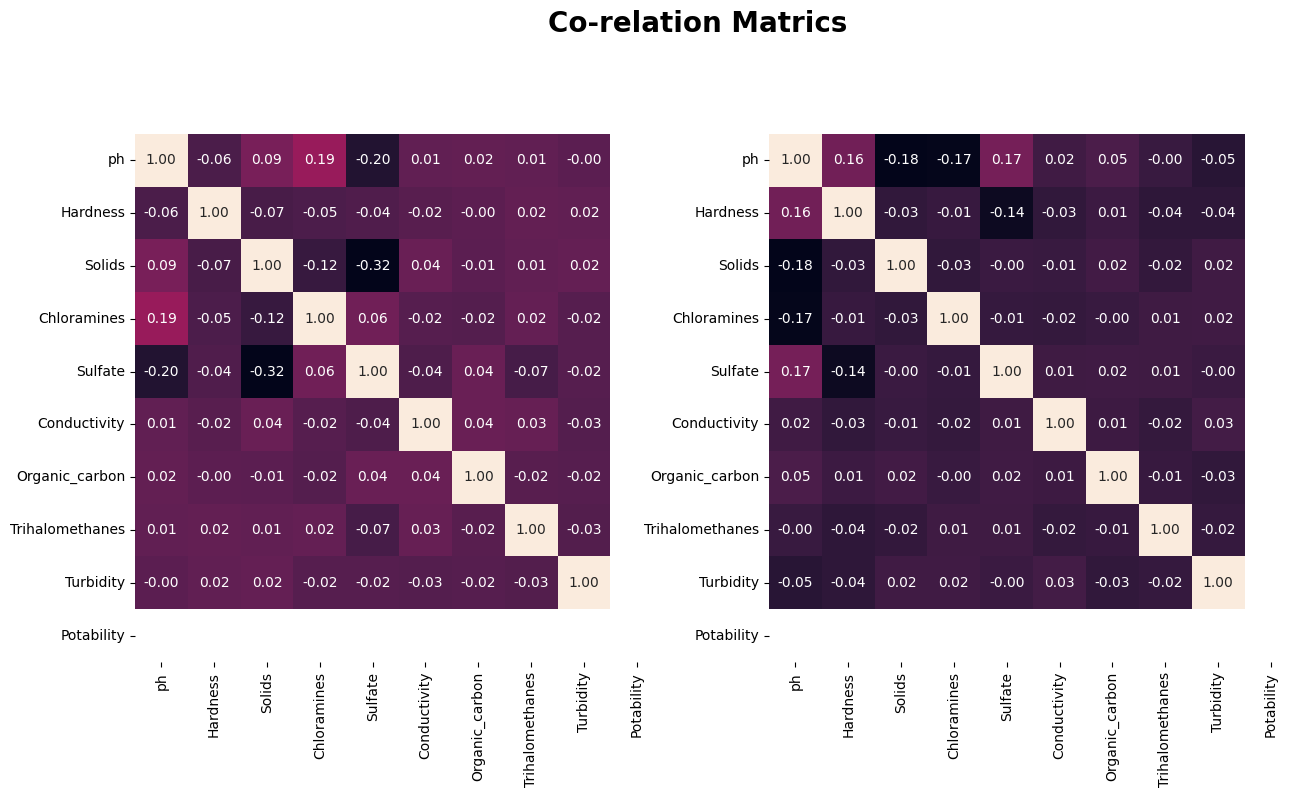

In [21]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(df[df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(df[df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

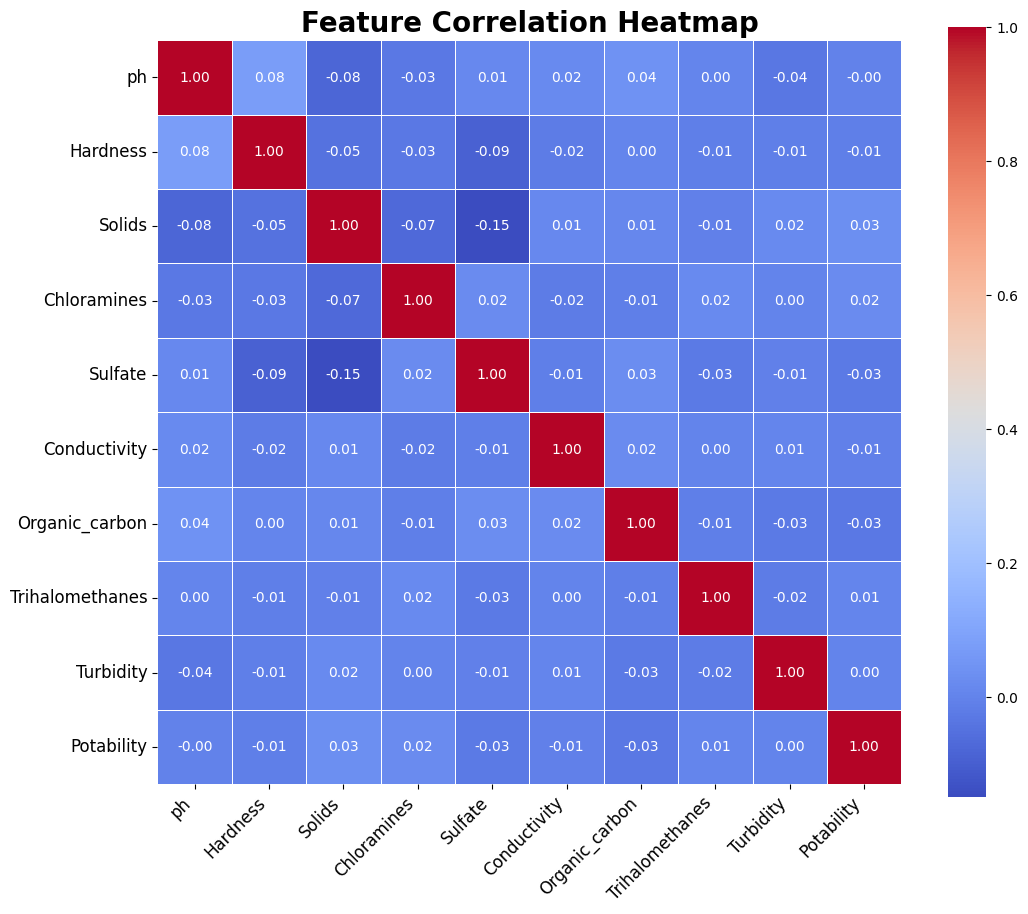

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the correlation matrix
fig, ax = plt.subplots(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True, fmt='0.2f', square=True, cmap='coolwarm', linewidths=0.5, ax=ax)

# Customize the heatmap
plt.title('Feature Correlation Heatmap', size=20, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


# 5.0 PCA

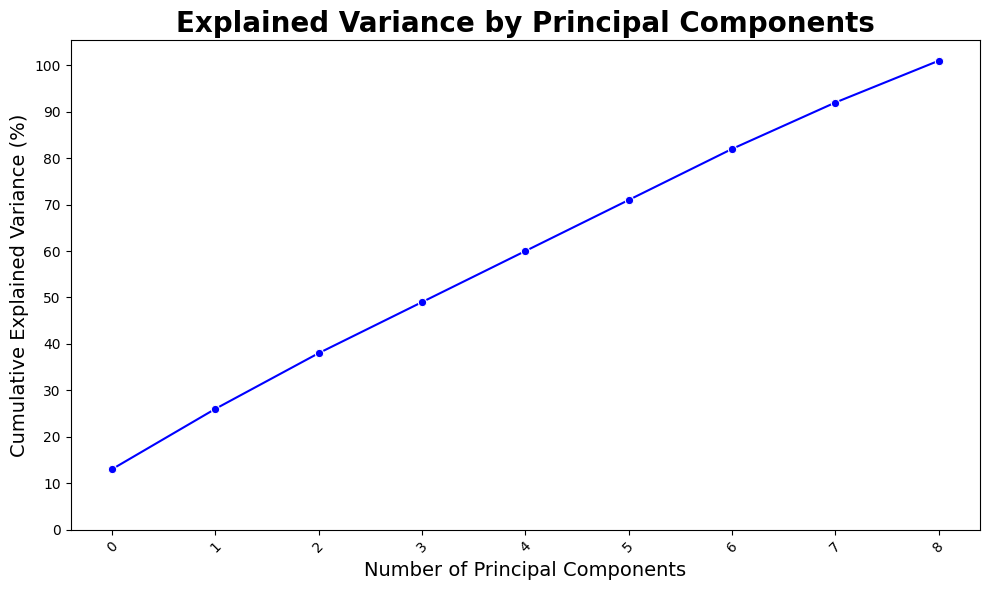

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data preparation
X = df.drop(['Potability'], axis=1)
y = df['Potability']

# Standardize the features
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# PCA decomposition
decom = PCA()
decom.fit(X_scaled)
ex_var = np.cumsum(np.round(decom.explained_variance_ratio_, 2)) * 100

# Plotting the explained variance
plt.figure(figsize=(10, 6))
sns.lineplot(y=ex_var, x=np.arange(0, len(ex_var)), marker='o', linestyle='-', color='b')
sns.scatterplot(y=ex_var, x=np.arange(0, len(ex_var)), color='r')

# Adding title and labels
plt.title('Explained Variance by Principal Components', fontsize=20, weight='bold')
plt.xlabel('Number of Principal Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=14)

# Customize ticks
plt.xticks(np.arange(0, len(ex_var), step=1), rotation=45)
plt.yticks(np.arange(0, 101, step=10))

# Show plot
plt.tight_layout()
plt.show()


# 6.0 Data Balancing

In [24]:
#handling imbalance in data and Scaling
from imblearn.over_sampling import SMOTE
samp = SMOTE()
X=df.drop(['Potability'], axis=1)
y=df['Potability']
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, y_train =samp.fit_resample(X_train,y_train)

scale = StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# 7.0 Model Selection

In [25]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train, y_train, scoring='accuracy', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

,model,cv_score
4,ExtraTreeClassifier(),0.601810
5,KNeighborsClassifier(),0.649859
0,AdaBoostClassifier(),0.686152
3,DecisionTreeClassifier(),0.711678
2,GradientBoostingClassifier(),0.754031
1,BaggingClassifier(),0.762091


#8.0 Hyperparameter Tuning

In [26]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Grd.fit(X_train, y_train)
print('Gradient Boosting Classifier')
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='accuracy')
grid_Bag.fit(X_train, y_train)
print('Bagging Classifier')
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

from sklearn.tree import DecisionTreeClassifier
param_dt = {'max_depth': [None, 10, 20, 30, 40, 50]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print('Decision Tree Classifier Classifier')
print(f"Best Estimator: {grid_dt.best_params_} , Best Score : {grid_dt.best_score_}")

from sklearn.ensemble import AdaBoostClassifier
param_ada = {'n_estimators': [50, 100, 200, 300, 400, 500]}
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid=param_ada, cv=5, scoring='accuracy')
grid_ada.fit(X_train, y_train)
print('Ada Boost Classifier')
print(f"Best Estimator: {grid_ada.best_params_} , Best Score : {grid_ada.best_score_}")

Gradient Boosting Classifier
Best Estimator: {'n_estimators': 300} , Best Score : 0.7644503976087079
Bagging Classifier
Best Estimator: {'n_estimators': 80} , Best Score : 0.7825943263211326
Decision Tree Classifier Classifier
Best Estimator: {'max_depth': None} , Best Score : 0.7173949579831932
Ada Boost Classifier
Best Estimator: {'n_estimators': 100} , Best Score : 0.6999244261462975


## 8.1 Classification Report and Heatmap

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0     0.8519    0.7333    0.7882       510
           1     0.6421    0.7896    0.7083       309

    accuracy                         0.7546       819
   macro avg     0.7470    0.7615    0.7482       819
weighted avg     0.7728    0.7546    0.7580       819



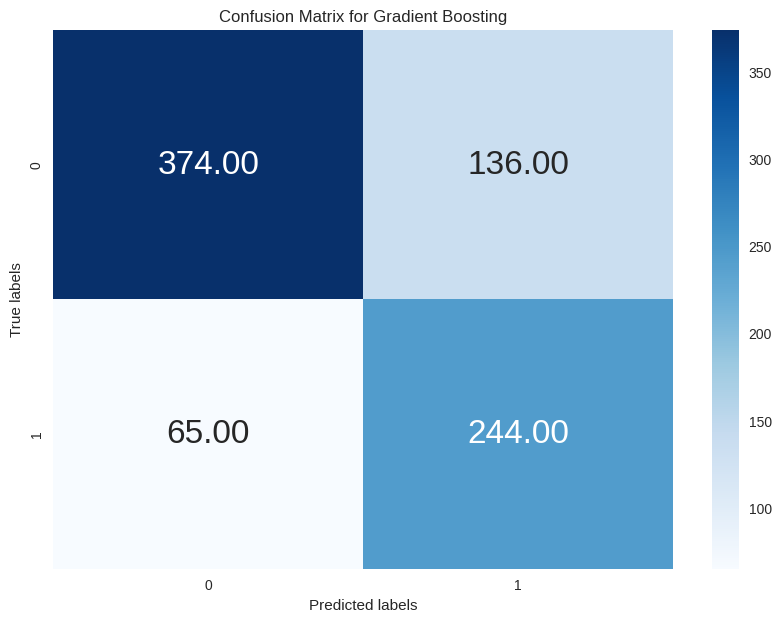

Classification Report for Bagging:
              precision    recall  f1-score   support

           0     0.8201    0.7686    0.7935       510
           1     0.6540    0.7217    0.6862       309

    accuracy                         0.7509       819
   macro avg     0.7370    0.7452    0.7398       819
weighted avg     0.7574    0.7509    0.7530       819



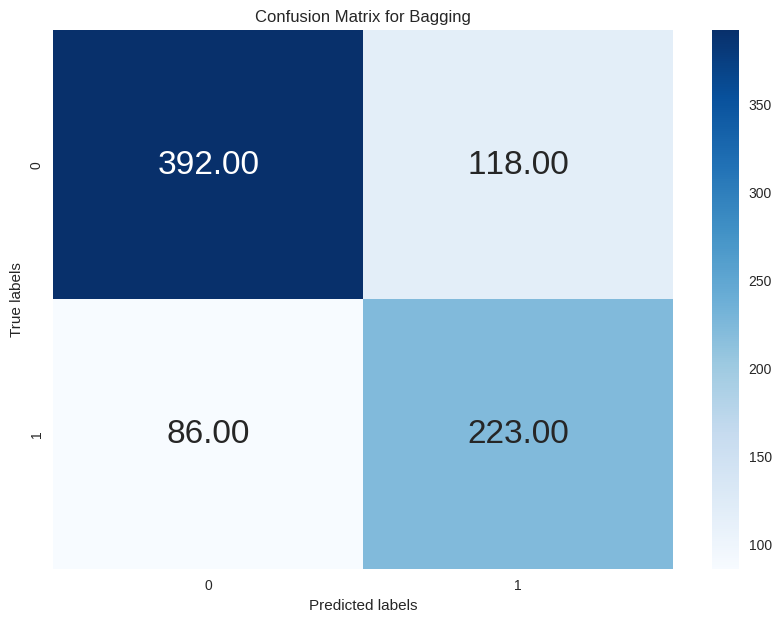

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0     0.7756    0.6980    0.7348       510
           1     0.5722    0.6667    0.6158       309

    accuracy                         0.6862       819
   macro avg     0.6739    0.6824    0.6753       819
weighted avg     0.6989    0.6862    0.6899       819



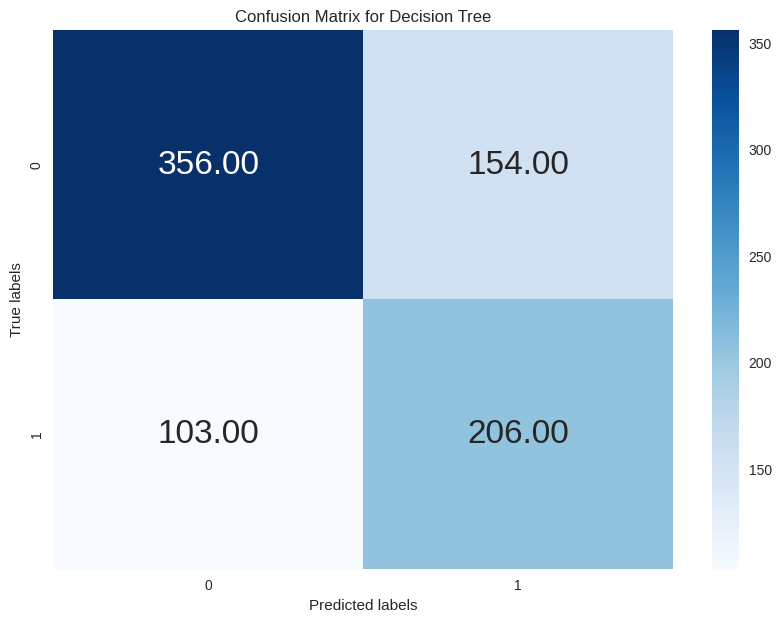

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0     0.7865    0.6647    0.7205       510
           1     0.5593    0.7023    0.6227       309

    accuracy                         0.6789       819
   macro avg     0.6729    0.6835    0.6716       819
weighted avg     0.7008    0.6789    0.6836       819



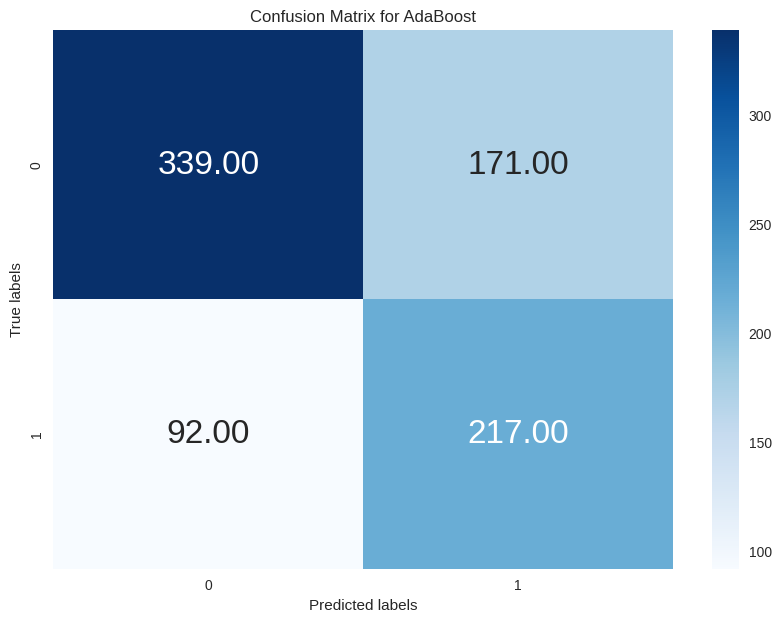

In [31]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to train model, make predictions, and plot classification report and confusion matrix
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    pred = model.predict(X_test)

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, pred, digits=4))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 24})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Define models with their respective best parameters
models = {
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=400),
    'Bagging': BaggingClassifier(n_estimators=300),
    'Decision Tree': DecisionTreeClassifier(max_depth=30),
    'AdaBoost': AdaBoostClassifier(n_estimators=500)
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0     0.8618    0.7333    0.7924       510
           1     0.6468    0.8058    0.7176       309

    accuracy                         0.7607       819
   macro avg     0.7543    0.7696    0.7550       819
weighted avg     0.7806    0.7607    0.7642       819



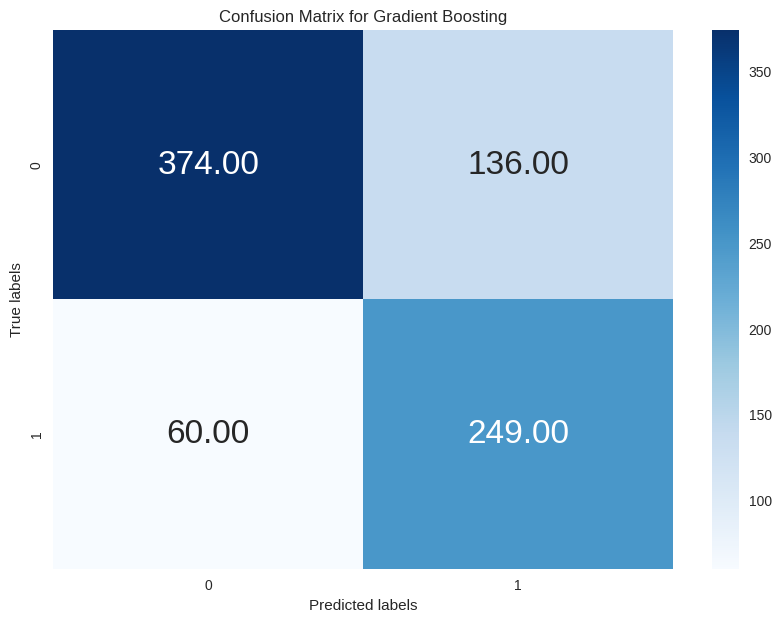

Classification Report for Bagging:
              precision    recall  f1-score   support

           0     0.8157    0.7725    0.7936       510
           1     0.6548    0.7120    0.6822       309

    accuracy                         0.7497       819
   macro avg     0.7352    0.7423    0.7379       819
weighted avg     0.7550    0.7497    0.7515       819



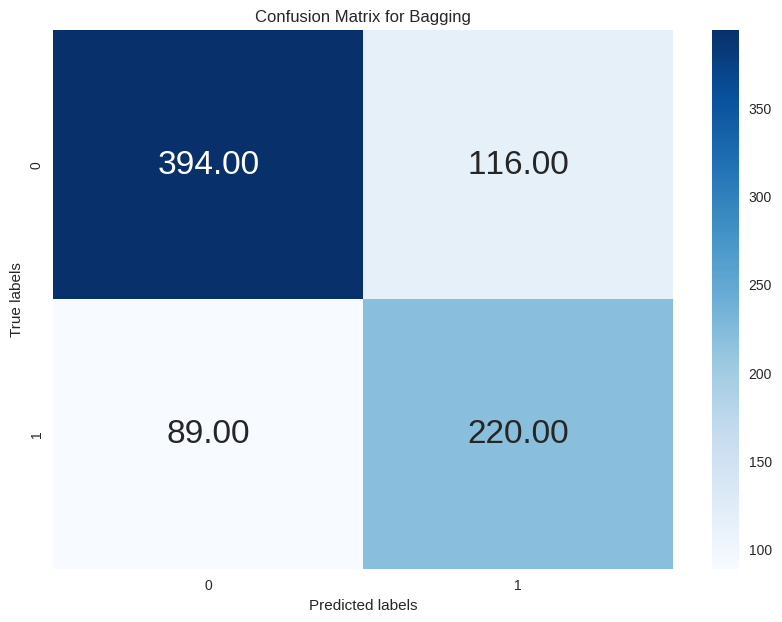

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0     0.7780    0.6941    0.7337       510
           1     0.5714    0.6731    0.6181       309

    accuracy                         0.6862       819
   macro avg     0.6747    0.6836    0.6759       819
weighted avg     0.7001    0.6862    0.6901       819



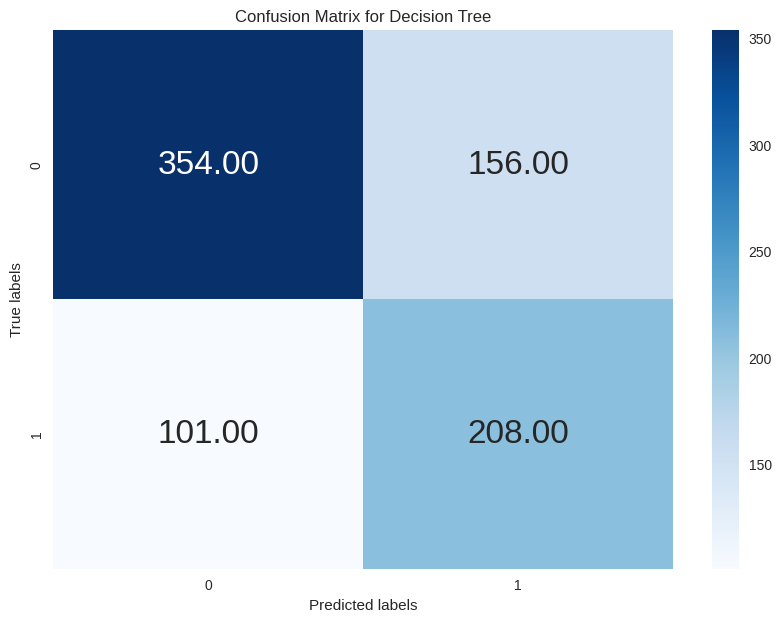

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0     0.8221    0.6706    0.7387       510
           1     0.5831    0.7605    0.6601       309

    accuracy                         0.7045       819
   macro avg     0.7026    0.7156    0.6994       819
weighted avg     0.7319    0.7045    0.7090       819



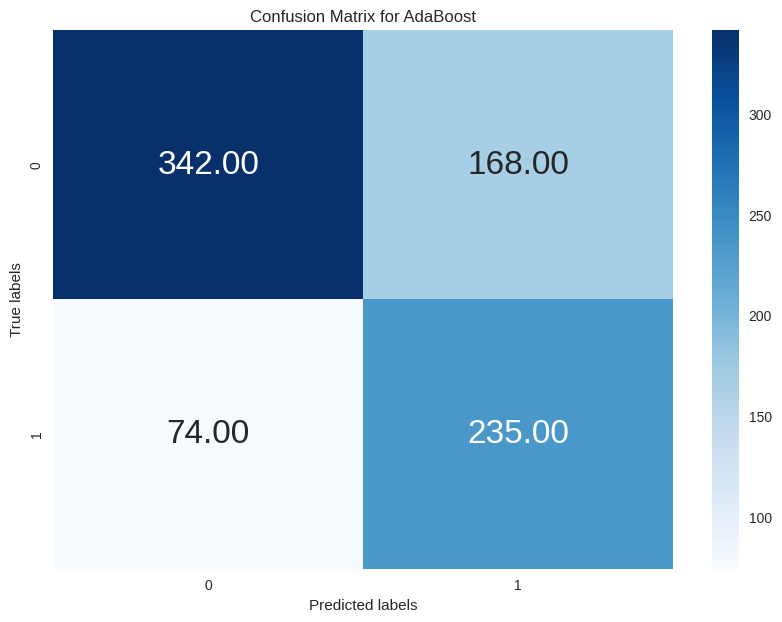

In [33]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to train model, make predictions, and plot classification report and confusion matrix
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    pred = model.predict(X_test)

    # Print classification report
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, pred, digits=4))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 24})
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Define models with their respective best parameters
models = {
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=300),
    'Bagging': BaggingClassifier(n_estimators=80),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100)
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test, model_name)
